# 01. PyTorch Workflow Fundamentals

In [1]:
what_i_going_to_learn = {1: "Getting data ready",
                         2: "Building a model",
                         3: "Fitting the model to data (training)",
                         4: "Making predictions and evaluating a model (inference)",
                         5: "Saving and loading a model",
                         6: "Putting it all together"

}

In [2]:
what_i_going_to_learn

{1: 'Getting data ready',
 2: 'Building a model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating a model (inference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:

1.   Turn your data, whatever it is, into numbers (a representation).
2.   Pick or build a model to learn the representation as best as possible.

We'll use linear regression to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these **parameters** using gradient descent.

y = a + bX

In [4]:
# Create know parameter

weight = 0.7 # This is a
bias = 0.3 # This is b

start = 0
end = 1
step = 0.02
X = torch.arange(start = start, end = end, step = step).unsqueeze(dim=1)
print(X[:10])
y = weight*X + bias
print(y[:10])
print("lenght of X: {}".format(len(X)))
print("length of y : {}".format(len(y)))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
lenght of X: 50
length of y : 50


# Split data into training and test sets
We split the X_train and y_train with 80% of actual data also called feature
We split X_test and y_test with rest 20% actual data also called label

In [5]:
# Splitting the data into train and test
train_split = int(len(X)*0.8)
print(train_split)
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

# Visualize the data

In [6]:
import matplotlib.pyplot as plt

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
  '''
  Plot tarining, test and prediction data
  '''
  plt.figure(figsize=(10,7))

  # Plot the test data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")

  # plot the train data in green
  plt.scatter(test_data, test_label, c="g", s=4, label = "Test Data")

  #plot the prediction in red
  if predictions is not None:
    plt.scatter(test_label,predictions, c="r", s=4, label ="Prediction Data")

  # Show the legend

  plt.legend()






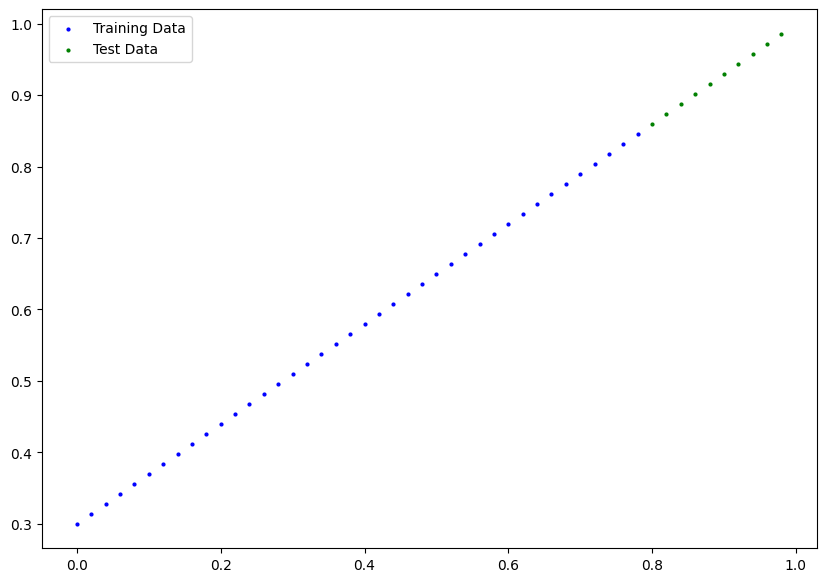

In [7]:
plot_prediction()

# 2. Build model

In [10]:
# Create a Line Regression class
class LineRegression(nn.Module): # Amost everything in pytorch is nn module,neural networl lego bricks
    # Calling __init_- constrcution
    def __init__(self):
        super().__init__()
        self.weights = nn.parameter(torch.rand(1, # start with the randmon weight. It will adjust the value
                                           requires_grad= True, #  <- can we update this value with gradient descent?
                                           dtype=torch.float32))
        self.bias = nn.parameter(torch.rand(1, #satrt with random bias, This will adjust the value
                                         requires_grad=True,
                                        dtype = torch.float))
    # Forward defines the computation in the model
    def forward(self, x: torch.tensor) -> torch.tensor:
      return self.weights*x + self.bias

